<a href="https://colab.research.google.com/github/GANYMEDEBANK/Features/blob/main/SHAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install catboost
!pip install shap

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import catboost
from catboost import CatBoostClassifier

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nazmulislam1803029","key":"b1c362bc793175237021a8fffe911213"}'}

In [4]:
!mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c titanic

  0% 0.00/34.1k [00:00<?, ?B/s]
100% 34.1k/34.1k [00:00<00:00, 22.0MB/s]


In [5]:
!unzip titanic.zip

Archive:  titanic.zip
  inflating: gender_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [6]:
df = pd.read_csv("/content/train.csv")

In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
# strip first letter from cabin number if there
df['Cabin'] = df['Cabin'].replace(np.NaN, 'U') 
df['Cabin'] = [ln[0] for ln in df['Cabin'].values]
#df['Cabin'] = df['Cabin'].replace('U', 'Unknown') 

In [9]:
df['isfemale'] = np.where(df['Sex'] == 'female', 1, 0)

In [10]:
df = df[[f for f in list(df) if f not in ['Sex', 'Name', 'Boat', 'Ticket']]]

In [11]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Embarked,isfemale
0,1,0,3,22.0,1,0,7.2500,U,S,0
1,2,1,1,38.0,1,0,71.2833,C,C,1
2,3,1,3,26.0,0,0,7.9250,U,S,1
3,4,1,1,35.0,1,0,53.1000,C,S,1
4,5,0,3,35.0,0,0,8.0500,U,S,0


In [12]:
df = df.drop("PassengerId", axis = 1)
df['Pclass'] = np.where(df['Pclass'] == 1, 'First',np.where(df['Pclass'] == 2, 'Second', 'Third'))

In [13]:
df['Embarked'] = df['Embarked'].replace(np.NaN, 'Unknown')

In [14]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Embarked,isfemale
0,0,Third,22.0,1,0,7.2500,U,S,0
1,1,First,38.0,1,0,71.2833,C,C,1
2,1,Third,26.0,0,0,7.9250,U,S,1
3,1,First,35.0,1,0,53.1000,C,S,1
4,0,Third,35.0,0,0,8.0500,U,S,0


In [15]:
features = [feat for feat in list(df) if feat != "Survived"]
features

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked', 'isfemale']

In [16]:
cate_feat = np.where(df[features].dtypes != np.float)[0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


In [17]:
cate_feat

array([0, 2, 3, 5, 6, 7])

In [18]:
X_train, X_test , y_train, y_test = train_test_split(df[features], df['Survived'], test_size = 0.3, random_state = 0)

In [19]:
params = {'iterations':5000,
        'learning_rate':0.01,
        'cat_features':cate_feat,
        'depth':3,
        'eval_metric':'AUC',
        'verbose':200,
        'od_type':"Iter", # overfit detector
        'od_wait':500, # most recent best iteration to wait before stopping
        'random_seed': 1
          }

In [20]:
model = CatBoostClassifier(**params)
model.fit(
    X_train, y_train,
    eval_set = (X_test, y_test),
    use_best_model = True,
    plot = True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	test: 0.8205655	best: 0.8205655 (0)	total: 51.1ms	remaining: 4m 15s
200:	test: 0.8605357	best: 0.8653571 (84)	total: 315ms	remaining: 7.53s
400:	test: 0.8646429	best: 0.8653571 (84)	total: 592ms	remaining: 6.79s
600:	test: 0.8647321	best: 0.8664881 (471)	total: 874ms	remaining: 6.4s
800:	test: 0.8649702	best: 0.8664881 (471)	total: 1.31s	remaining: 6.88s
1000:	test: 0.8698810	best: 0.8698810 (998)	total: 1.6s	remaining: 6.4s
1200:	test: 0.8720833	best: 0.8724405 (1185)	total: 1.91s	remaining: 6.05s
1400:	test: 0.8725595	best: 0.8733333 (1363)	total: 2.29s	remaining: 5.88s
1600:	test: 0.8732738	best: 0.8736905 (1490)	total: 2.57s	remaining: 5.46s
1800:	test: 0.8737500	best: 0.8741667 (1722)	total: 2.91s	remaining: 5.17s
2000:	test: 0.8729762	best: 0.8741667 (1722)	total: 3.48s	remaining: 5.22s
2200:	test: 0.8730357	best: 0.8741667 (1722)	total: 3.79s	remaining: 4.82s
Stopped by overfitting detector  (500 iterations wait)

bestTest = 0.8741666667
bestIteration = 1722

Shrink model to 

In [21]:
import shap
from catboost import CatBoostClassifier, Pool
shap_values = model.get_feature_importance(Pool(X_test, label = y_test, cat_features = cate_feat),
                                                type = "ShapValues")

In [22]:
expected_value = shap_values[0,-1]
shap_values = shap_values[:,:-1]

shap.initjs()
shap.force_plot(expected_value, shap_values[0,:], X_test.iloc[0,:])

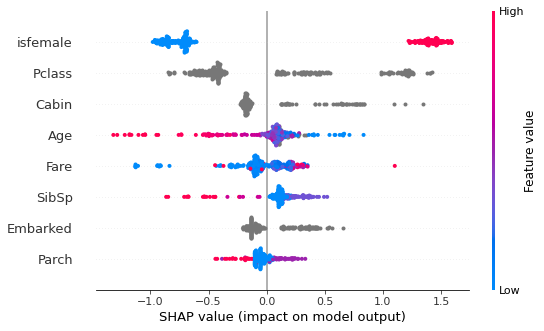

In [23]:
shap.summary_plot(shap_values, X_test)